In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('./game_data.csv')

# data exploration

In [35]:
data.head(5)

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,8.98893,8.61858,15376,https://cf.geekdo-images.com/original/img/lDN3...,12,"Action / Movement Programming, Co-operative Pl...",25928,"Adventure, Exploration, Fantasy, Fighting, Min...",Isaac Childres,3.7543
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,8.66140,8.50163,26063,https://cf.geekdo-images.com/original/img/P_Sw...,13,"Action Point Allowance System, Co-operative Pl...",41605,"Environmental, Medical","Rob Daviau, Matt Leacock",2.8210
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,8.60673,8.30183,12352,https://cf.geekdo-images.com/original/img/1d2h...,14,"Action Point Allowance System, Auction/Bidding...",15848,"Card Game, Civilization, Economic",Vlaada Chvátil,4.3678
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,8.38461,8.19914,26004,https://cf.geekdo-images.com/original/img/o8z_...,12,"Card Drafting, Hand Management, Set Collection...",33340,"Economic, Environmental, Industry / Manufactur...",Jacob Fryxelius,3.2456
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,8.33954,8.19787,31301,https://cf.geekdo-images.com/original/img/ZPnn...,13,"Area Control / Area Influence, Campaign / Batt...",42952,"Modern Warfare, Political, Wargame","Ananda Gupta, Jason Matthews",3.5518


## bad data

### code

#### check missing value

In [5]:
print(data.isnull().sum().sort_values())
data['image_url']=data['image_url'].fillna('missing')

rank           0
category       0
owned          0
mechanic       0
age            0
num_votes      0
geek_rating    0
avg_rating     0
designer       0
year           0
min_time       0
avg_time       0
max_players    0
min_players    0
names          0
game_id        0
bgg_url        0
max_time       0
weight         0
image_url      1
dtype: int64


#### check some variables

In [6]:
data['names'].value_counts()

Cosmic Encounter                                                               4
Samurai                                                                        3
Lord of the Rings: The Confrontation                                           2
Hellas                                                                         2
Santorini                                                                      2
Crimson Skies                                                                  2
Tales of the Arabian Nights                                                    2
Axis & Allies                                                                  2
Barbarossa                                                                     2
Saga                                                                           2
Founding Fathers                                                               2
Fresh Fish                                                                     2
Cry Havoc                   

In [7]:
data.loc[data['names']=='Cosmic Encounter',:]

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
99,100,https://boardgamegeek.com/boardgame/39463/cosm...,39463,Cosmic Encounter,3,5,120,60,120,2008,7.58087,7.42682,22001,https://cf.geekdo-images.com/original/img/SUTj...,12,"Hand Management, Partnerships, Take That, Vari...",26591,"Bluffing, Negotiation, Science Fiction, Space ...","Bill Eberle, Jack Kittredge, Bill Norton, Pete...",2.5576
816,816,https://boardgamegeek.com/boardgame/15/cosmic-...,15,Cosmic Encounter,2,6,90,90,90,1977,6.92400,6.54173,3697,https://cf.geekdo-images.com/original/img/5koT...,12,"Hand Management, Variable Player Powers",4072,"Bluffing, Negotiation, Science Fiction","Bill Eberle, Jack Kittredge, Bill Norton, Pete...",2.3705
1381,1382,https://boardgamegeek.com/boardgame/40529/cosm...,40529,Cosmic Encounter,3,6,60,60,60,1991,7.18291,6.24120,912,https://cf.geekdo-images.com/original/img/sIhS...,0,Variable Player Powers,1350,"Bluffing, Card Game, Science Fiction","Bill Eberle, Jack Kittredge, Bill Norton, Pete...",2.6393
2340,2341,https://boardgamegeek.com/boardgame/40531/cosm...,40531,Cosmic Encounter,2,4,60,60,60,2000,6.39733,5.93775,1162,https://cf.geekdo-images.com/original/img/pfPp...,0,Variable Player Powers,2189,"Bluffing, Card Game, Science Fiction","Bill Eberle, Jack Kittredge, Bill Norton, Pete...",2.3140


In [8]:
data['min_players'].value_counts()
data.loc[data['min_players']==0,:].head(5)

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,avg_rating,geek_rating,num_votes,image_url,age,mechanic,owned,category,designer,weight
1836,1837,https://boardgamegeek.com/boardgame/37301/decktet,37301,Decktet,0,0,30,30,30,2008,7.51461,6.07096,443,https://cf.geekdo-images.com/original/img/F5Th...,0,none,1384,"Card Game, Game System, Print & Play",P. D. Magnus,1.9655
2210,2211,https://boardgamegeek.com/boardgame/18291/unpu...,18291,Unpublished Prototype,0,0,0,0,0,0,6.98141,5.96702,601,https://cf.geekdo-images.com/original/img/6hIA...,0,none,927,none,(Uncredited),2.3750
2541,2542,https://boardgamegeek.com/boardgame/21804/trad...,21804,Traditional Card Games,0,0,0,0,0,0,6.54585,5.89745,705,https://cf.geekdo-images.com/original/img/MQYo...,0,none,1248,"Card Game, Game System",(Uncredited),2.0167
2556,2557,https://boardgamegeek.com/boardgame/23953/outs...,23953,Outside the Scope of BGG,0,0,0,0,0,0,6.75668,5.89508,518,https://cf.geekdo-images.com/original/img/0hEl...,0,none,2251,none,(Uncredited),1.6582
2803,2804,https://boardgamegeek.com/boardgame/99358/ston...,99358,Stonewall Jackson's Way II,0,2,720,0,720,2013,8.47756,5.85133,156,https://cf.geekdo-images.com/original/img/ggz1...,0,"Dice Rolling, Hex-and-Counter",612,"American Civil War, Wargame","Joseph M. Balkoski, Ed Beach, Mike Belles, Chr...",3.7895


### conclusion
1.We drop the data of minimum number of players equal 0 which seem bad lines data <br>
2.The same name seems different versions of game 'Cosmic Encounter'.Currently we don't have enought information for this.<br>
3.The data is clean and do not have much missing values.Therefore we just filled the one missing values of image url

## exploration on category

### code

In [9]:
total_list=[]
for temp_list in data['category'].str.split(', '):
    total_list+=temp_list
print(np.unique(total_list))
print(len(np.unique(total_list)))
# we have 163 cateogries of game

['Abstract Strategy' 'Action / Dexterity' 'Adventure' 'Age of Reason'
 'American Civil War' 'American Indian Wars' 'American Revolutionary War'
 'American West' 'Ancient' 'Animals' 'Arabian' 'Aviation / Flight'
 'Bluffing' 'Book' 'Card Game' "Children's Game" 'City Building'
 'Civil War' 'Civilization' 'Collectible Components' 'Comic Book / Strip'
 'Deduction' 'Dice' 'Economic' 'Educational' 'Electronic' 'Environmental'
 'Expansion for Base-game' 'Exploration' 'Fantasy' 'Farming' 'Fighting'
 'Game System' 'Horror' 'Humor' 'Industry / Manufacturing' 'Korean War'
 'Mafia' 'Math' 'Mature / Adult' 'Maze' 'Medical' 'Medieval' 'Memory'
 'Miniatures' 'Modern Warfare' 'Movies / TV / Radio theme'
 'Murder/Mystery' 'Music' 'Mythology' 'Napoleonic' 'Nautical'
 'Negotiation' 'Novel-based' 'Number' 'Party Game' 'Pike and Shot'
 'Pirates' 'Political' 'Post-Napoleonic' 'Prehistoric' 'Print & Play'
 'Puzzle' 'Racing' 'Real-time' 'Religious' 'Renaissance' 'Science Fiction'
 'Space Exploration' 'Spies/S

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
cat = pd.DataFrame(mlb.fit_transform(data['category'].str.split(', ')),
                   columns=mlb.classes_,
                   index=data.index)

In [11]:
plot_cat=cat.sum()[cat.sum()>200].sort_values()

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(y=plot_cat,x=plot_cat.index,ax=ax)
for item in ax.get_xticklabels():
    item.set_rotation(65)
ax.set_title('most categories games')
ax.set_xlabel('name of the games')
ax.set_ylabel('counts')

Text(0,0.5,'counts')

In [13]:
cleaned_data=pd.merge(data,cat,left_index=True,right_index=True,how='inner')
cleaned_data.head(5)

,rank,bgg_url,game_id,names,min_players,max_players,avg_time,min_time,max_time,year,...,Travel,Trivia,Video Game Theme,Vietnam War,Wargame,Word Game,World War I,World War II,Zombies,none
0,1,https://boardgamegeek.com/boardgame/174430/glo...,174430,Gloomhaven,1,4,120,60,120,2017,...,0,0,0,0,0,0,0,0,0,0
1,2,https://boardgamegeek.com/boardgame/161936/pan...,161936,Pandemic Legacy: Season 1,2,4,60,60,60,2015,...,0,0,0,0,0,0,0,0,0,0
2,3,https://boardgamegeek.com/boardgame/182028/thr...,182028,Through the Ages: A New Story of Civilization,2,4,240,180,240,2015,...,0,0,0,0,0,0,0,0,0,0
3,4,https://boardgamegeek.com/boardgame/167791/ter...,167791,Terraforming Mars,1,5,120,120,120,2016,...,0,0,0,0,0,0,0,0,0,0
4,5,https://boardgamegeek.com/boardgame/12333/twil...,12333,Twilight Struggle,2,2,180,120,180,2005,...,0,0,0,0,1,0,0,0,0,0


In [14]:
cleaned_data.to_csv('./cleaned_game_data.csv',index=False)

### conclusion


1. we have 84 total cateogries of data and convert to one-hot encoding for further modeling

# distribution plot of some variables

## age

In [15]:
data['age'].value_counts()

12    1393
10    1101
8      829
14     533
13     454
0      218
6      101
7       83
9       80
15      42
5       41
11      31
16      28
18      21
4       21
17      12
3        7
21       2
2        1
42       1
Name: age, dtype: int64

In [22]:
data['max_time'].quantile(0.95)

300.0

C:\Users\ttodd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


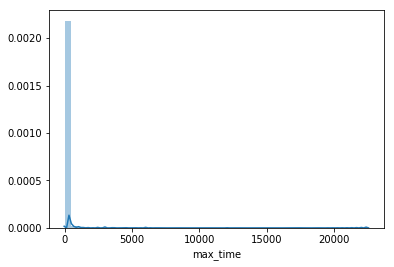

In [17]:
%matplotlib inline
sns.distplot(data['max_time'])

Text(0.5, 0, 'age of games')

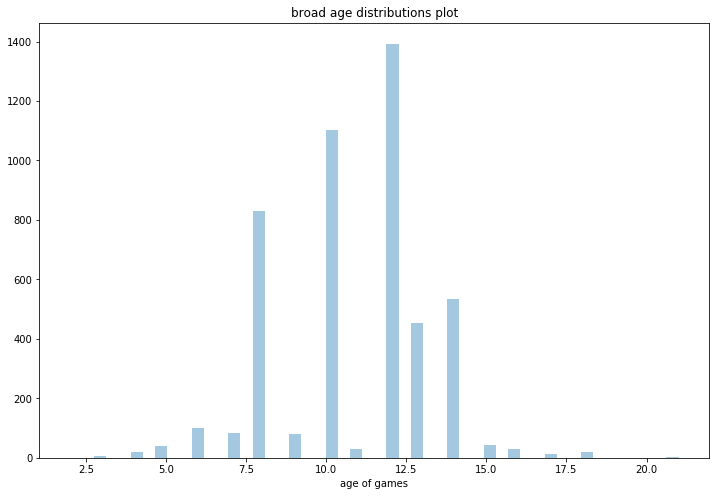

In [18]:

fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(data['age'][(data['age']!=42)&(data['age']!=0)],ax=ax,kde=False)
ax.set_title('broad age distributions plot')
ax.set_xlabel('age of games')

## average_rating and geek rating

Text(0.5, 1.0, 'geek rating distribution plot')

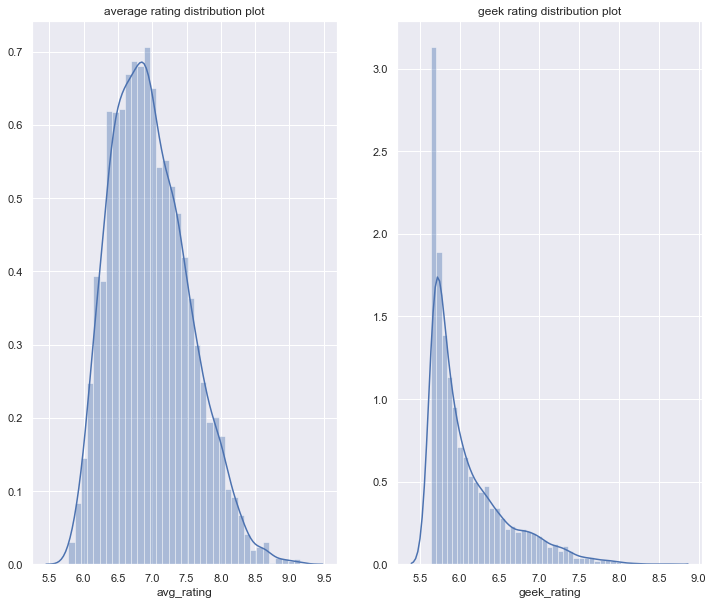

In [172]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

sns.distplot(data['avg_rating'],ax=axes[0])
axes[0].set_title('average rating distribution plot')
sns.distplot(data['geek_rating'],ax=axes[1])
axes[1].set_title('geek rating distribution plot')

### conclusion
geeks are much stricker than normal users,giving scores of 5 in most of games

# Other EDAV 

## boxplot on average rating of different category

In [24]:
cat.to_csv('./cat.csv',index=False)

In [150]:
boxplot_df=pd.merge(data['avg_rating'],cat,left_index=True,right_index=True)
melted_boxplot=pd.melt(boxplot_df,id_vars=['avg_rating'],value_vars=np.unique(total_list),var_name='category',value_name='belong')
melted_boxplot=melted_boxplot.loc[(melted_boxplot['belong']==1)&(melted_boxplot['category'].isin(plot_cat.index)),:]
melted_boxplot=pd.merge(melted_boxplot,melted_boxplot.groupby('category')['avg_rating'].mean(),
                        left_on='category',right_index=True,how='left')

melted_boxplot.columns=['avg_rating','category','belong','mean_average_rating']
melted_boxplot=melted_boxplot.sort_values('mean_average_rating',ascending=False)

Text(0, 0.5, 'average rating')

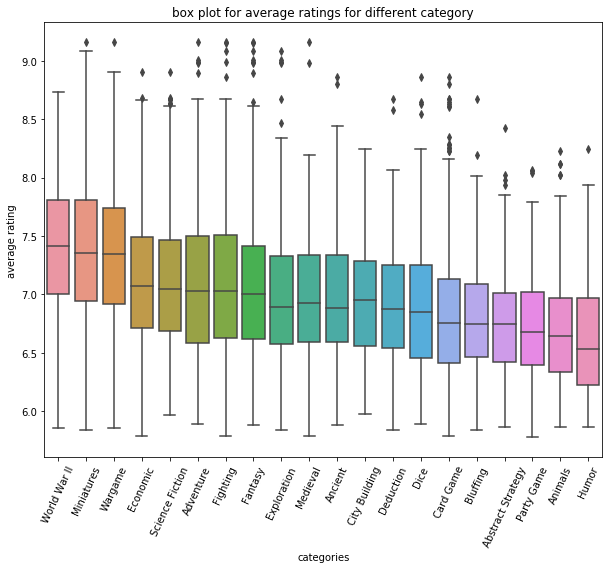

In [152]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(y='avg_rating',x='category',data=melted_boxplot,ax=ax)
for item in ax.get_xticklabels():
    item.set_rotation(65)
ax.set_title('box plot for average ratings for different category of top popular games')
ax.set_xlabel('categories')
ax.set_ylabel('average rating')

### conclusion

1.when we make box plot,we need unpivot dataframe by using pd.melt function ,convert columns back to stacked rows. T
hen we sort box plot values by mean of average rating.<br>
2.Highest ratings of games are in War game categories of those games are played most.

## heatmap

In [166]:
data.columns

Index(['rank', 'bgg_url', 'game_id', 'names', 'min_players', 'max_players',
       'avg_time', 'min_time', 'max_time', 'year', 'avg_rating', 'geek_rating',
       'num_votes', 'image_url', 'age', 'mechanic', 'owned', 'category',
       'designer', 'weight'],
      dtype='object')

(9, 0)

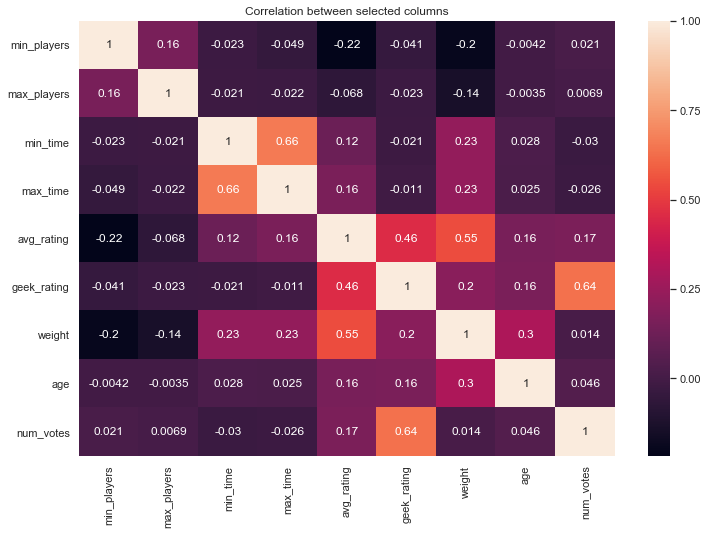

In [168]:
cols = ['min_players', 'max_players','min_time', 'max_time', 'avg_rating',
        'geek_rating', 'weight',  'age','num_votes' ]
cm = np.corrcoef(data[cols].values.T)
fig, ax = plt.subplots(figsize=(12,8))

heatmap = sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols,ax=ax)
heatmap.set_title('Correlation between selected columns')
ax.set_ylim([9, 0])

### Conclusion
Only geek correlation and averaging correlations,max time and min time have high correlations